### Laboratorio 10 - ChatGPT y Data Science

Stefano Aragoni, Carol Arévalo, Luis Santos

---------

*Objetivos*:
- Familiarizarse con el Análisis Exploratorio de Datos (EDA) utilizando Python.
- Aprender a desarrollar y evaluar modelos de aprendizaje automático.
- Reflexionar sobre la aplicabilidad de estas habilidades en contextos profesionales.

*Conjunto de Datos*:
- Utilizaremos datos de la "Encuesta Nacional de Condiciones de Vida 2014" (ENCOVI) de Guatemala. Estos datos deben ser limpiados y preprocesados antes del análisis.

*Pregunta Científica*:
- <font color=red>¿Podemos determinar si una persona es considerada pobre en Guatemala utilizando indicadores socioeconómicos de su hogar?</font>
    - Para esto, se utilizó específicamente el dataset de HOGARES. Esto debido a que presenta menos datos faltantes (a comparación del dataset de personas) y se considera que las variables socioeconómicas de un hogar pueden ser un buen indicador del nivel de pobreza de una persona.
    - Se tuvo que combinar Pobre no extr. y Pobre extr. para obtener una sola variable de pobreza. Esto para volver el problema a un problema de clasificación binaria.

--------

<font color=orange>

*Luis Furlán indicó que NO era necesario entregar un informe aparte si se realizaba una amplia descripción de las actividades realizadas dentro del Jupyter Notebook*

</font>

--------

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
import pyreadstat
import math
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np

from keras.optimizers import Adam
from keras.initializers import HeNormal
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from keras.regularizers import l1_l2

import warnings
warnings.filterwarnings("ignore")

#### **Parte 1: Análisis Exploratorio de Datos (40 Puntos)**

##### *Carga y Limpieza de Datos (10 puntos):*

Como primer paso, se debe cargar los datos y realizar una limpieza básica. Para esto, se recomienda seguir los siguientes pasos:

- Importar el conjunto de datos.
- Normalizar nombres de columnas.
- Identificar y tratar valores faltantes.


Como primer paso, como se puede observar a continuación, se <font color=orange>importa el conjunto de datos y se muestra la información de las columnas</font>. 

En este caso, en ambos archivos, se puede observar una gran cantidad de columnas. Asimismo, inicialmente se puede observar una gran cantidad de valores faltantes. Finalmente, cabe destacar que algunos nombres de columnas no son claros. Por lo tanto, sería relevante cambiarlos para que sean más claros y concisos.

In [21]:
# Cargar los datos desde el archivo .sav
df_hogar = pd.read_spss('./Datos_Lab/ENCOVI_Hogar.sav')

# Revisar los primeros registros para entender la estructura de los datos
df_hogar.head()

,REGION,DEPTO,AREA,UPM,NUMHOG,FACTOR,FACTOR3,POBREZA,THOGAR,PPB01,...,P01H10,P01H11,P01H12,P01H13,P01H14,P01H15,P01H16,DIA_ENC,MES_ENC,A_ENC
0,I. METROPOLITANA,Guatemala,Urbana,1.0,1.0,525.0,1575.0,No pobre,3.0,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,AGOSTO,2014.0
1,I. METROPOLITANA,Guatemala,Urbana,1.0,2.0,525.0,1575.0,No pobre,3.0,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,AGOSTO,2014.0
2,I. METROPOLITANA,Guatemala,Urbana,1.0,3.0,525.0,9450.0,Pobre no extr.,18.0,NO,...,Si,Si,Si,Si,Si,Si,Si,22.0,AGOSTO,2014.0
3,I. METROPOLITANA,Guatemala,Urbana,1.0,4.0,525.0,3150.0,Pobre no extr.,6.0,NO,...,No,No,No,No,No,No,No,24.0,AGOSTO,2014.0
4,I. METROPOLITANA,Guatemala,Urbana,1.0,5.0,525.0,1575.0,No pobre,3.0,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,AGOSTO,2014.0


In [22]:
# Cargar los datos desde el archivo .sav
df_personas = pd.read_spss('./Datos_Lab/ENCOVI_Personas.sav')

# Revisar los primeros registros para entender la estructura de los datos
df_hogar.head()

,REGION,DEPTO,AREA,UPM,NUMHOG,FACTOR,FACTOR3,POBREZA,THOGAR,PPB01,...,P01H10,P01H11,P01H12,P01H13,P01H14,P01H15,P01H16,DIA_ENC,MES_ENC,A_ENC
0,I. METROPOLITANA,Guatemala,Urbana,1.0,1.0,525.0,1575.0,No pobre,3.0,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,AGOSTO,2014.0
1,I. METROPOLITANA,Guatemala,Urbana,1.0,2.0,525.0,1575.0,No pobre,3.0,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,AGOSTO,2014.0
2,I. METROPOLITANA,Guatemala,Urbana,1.0,3.0,525.0,9450.0,Pobre no extr.,18.0,NO,...,Si,Si,Si,Si,Si,Si,Si,22.0,AGOSTO,2014.0
3,I. METROPOLITANA,Guatemala,Urbana,1.0,4.0,525.0,3150.0,Pobre no extr.,6.0,NO,...,No,No,No,No,No,No,No,24.0,AGOSTO,2014.0
4,I. METROPOLITANA,Guatemala,Urbana,1.0,5.0,525.0,1575.0,No pobre,3.0,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,AGOSTO,2014.0


Como se mencionó anteriormente, no todas las variables son relevantes para el resente estudio. Por tal razón, fue necesario explorar los archivos PDF proporcionados para identificar las variables de interés. A partir de esta exploración de los archivos PDF, se logró identificar las variables de interés para el presente estudio.

En el caso de ENCOVI_Hogares, se puede observar que las variables de interés son:

| NOMBRE DE COLUMNA (ACTUAL) | NOMBRE DE COLUMNA (NUEVO)  | DESCRIPCIÓN |
|----------------------------|----------------------------|-------------|
| POBREZA                    | Clasificacion_Pobreza      | Clasificación de hogar (Pobreza) VARIABLE OBJETIVO |
| P01E01_3                   | CompraComida               | ¿Compró comida en los últimos 7 días? |
| P01D27                     | Leña                       | ¿Utiliza leña para cocinar? |
| UNIDAD_FUENTES_8           | CompraElectricidad         | ¿Compró electricidad en el último mes? |
| THOGAR                     | TamañoHogar                | Tamaño del hogar |
| PPD04A                     | TotalPersonasHogar         | Total de personas en el hogar |
| P01D16                     | TratamientoAgua            | ¿Cómo trata el agua para beber? |







Por otro lado, las columnas más relevantes para el archivo ENCOVI_Individuos son:

| NOMBRE DE COLUMNA (ACTUAL) | NOMBRE DE COLUMNA (NUEVO) | DESCRIPCIÓN |
|----------------------------|---------------------------|-------------|
| POBREZA                    | Clasificacion_Pobreza      | Clasificación de hogar (Pobreza) VARIABLE OBJETIVO |
| THOGAR                     | TamañoHogar                | Tamaño del hogar |
| P05E16B                    | AñoNacimientoUltimoHijo    | Año de nacimiento del último hijo |
| P05E06B                    | AñoUltimaVezEmbarazada     | Año de último embarazo |
| P05E14                     | CantidadHijosNacidosVivos  | Cantidad de hijos nacidos vivos |
| P10B03B                    | CodigoActividadEcónomica   | Código de actividad económica |
| P06B27A                    | NivelDeEstudio             | Nivel de estudio |

Por tal razón, con esto en mente, se modificaron los datasets para que solo contengan las variables de interés. Asimismo, <font color=orange>se modificaron los nombres de las columnas</font> para que sean más claros y concisos.

El siguiente código fue generado por ChatGPT para poder convertir los nombres de las columnas de los datasets. 

Como se puede observar, se utilizó la función `rename` para cambiar los nombres de las columnas. Asimismo, se utilizó la función `drop` para eliminar las columnas que no son de interés para el presente estudio.

In [23]:
# Renombrar las columnas del DataFrame df_hogar
columnas_hogar = {
    'POBREZA': 'Clasificacion_Pobreza',
    'P01E01_3': 'CompraComida',
    'P01D27': 'Leña',
    'UNIDAD_FUENTES_8': 'CompraElectricidad',
    'THOGAR': 'TamañoHogar',
    'PPD04A': 'TotalPersonasHogar',
    'P01D16': 'TratamientoAgua',
}

df_hogar.rename(columns=columnas_hogar, inplace=True)

# Crear un nuevo DataFrame con las columnas especificadas
df_hogar = df_hogar[['Clasificacion_Pobreza', 'CompraComida', 'Leña', 'CompraElectricidad', 'TamañoHogar', 'TotalPersonasHogar', 'TratamientoAgua']]
df_hogar['CompraElectricidad'].replace('unidades', 'No', inplace=True)
df_hogar['CompraElectricidad'].replace('', 'Sí', inplace=True)

# Mostrar los primeros registros para verificar los cambios
df_hogar.head()

,Clasificacion_Pobreza,CompraComida,Leña,CompraElectricidad,TamañoHogar,TotalPersonasHogar,TratamientoAgua
0,No pobre,1.0,No,Sí,3.0,3.0,Compran agua purificada
1,No pobre,1.0,No,Sí,3.0,3.0,Compran agua purificada
2,Pobre no extr.,1.0,Si,No,18.0,18.0,Compran agua purificada
3,Pobre no extr.,2.0,No,No,6.0,6.0,Ninguna
4,No pobre,2.0,No,Sí,3.0,3.0,Compran agua purificada


In [24]:
# Renombrar las columnas del DataFrame df_individuos
columnas_individuos = {
    'POBREZA': 'Clasificacion_Pobreza',
    'THOGAR': 'TamañoHogar',
    'P05E16B': 'AñoNacimientoUltimoHijo',
    'P05E06B': 'AñoUltimaVezEmbarazada',
    'P05E14': 'CantidadHijosNacidosVivos',
    'P10B03B': 'CodigoActividadEconómica',
    'P06B27A': 'NivelDeEstudio'
}

df_personas.rename(columns=columnas_individuos, inplace=True)

# Crear un nuevo DataFrame con las columnas especificadas
df_personas = df_personas[['Clasificacion_Pobreza', 'TamañoHogar', 'AñoNacimientoUltimoHijo', 'AñoUltimaVezEmbarazada', 'CantidadHijosNacidosVivos', 'CodigoActividadEconómica', 'NivelDeEstudio']]

# Mostrar los primeros registros para verificar los cambios
df_personas.head()


,Clasificacion_Pobreza,TamañoHogar,AñoNacimientoUltimoHijo,AñoUltimaVezEmbarazada,CantidadHijosNacidosVivos,CodigoActividadEconómica,NivelDeEstudio
0,No pobre,3.0,NaN,NaN,NaN,Actividades jurídicas y de contabilidad,4013.0
1,No pobre,3.0,NaN,NaN,NaN,NaN,211.0
2,No pobre,3.0,NaN,NaN,NaN,Actividades de asociaciones,4013.0
3,No pobre,3.0,NaN,NaN,NaN,Actividades de los hogares como empleadores ...,1.0
4,No pobre,3.0,NaN,NaN,NaN,"Comercio al por menor, excepto el de vehícul...",139.0


Como tercer paso de la sección de "Carga y Limpieza de Datos", se procedió a <font color=orange>limpiar y manejear los valores faltantes</font>.

Como se puede observar a continuación, <font color=red> el dataset df_personas presenta muchos valores faltantes, mientras que el dataset df_hogares no tiene muchos valores faltantes</font>. Por tal razón, **se decide no utilizar el dataset df_personas para el presente estudio**.

Cabe destacar que se decidió rellenar o "tratar" el dataset df_personas debido a que NO es óptimo rellenar los valores faltantes con la media o la mediana debido a que se perdería mucha información. Asimismo, no vale la pena eliminar las filas con valores faltantes debido a que se perdería mucha información. En realidad, se eliminaría la mayoría de las filas.


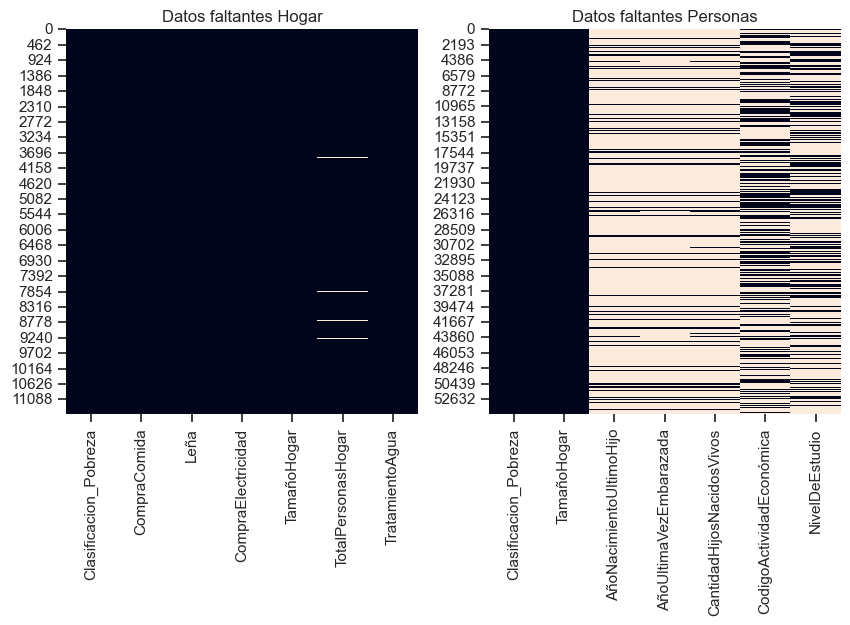

In [25]:
# Mostrar lado a lado heatmaps de los datos faltantes de ambos datasets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(df_hogar.isnull(), cbar=False)
plt.title('Datos faltantes Hogar')

plt.subplot(1, 2, 2)
sns.heatmap(df_personas.isnull(), cbar=False)
plt.title('Datos faltantes Personas')

plt.show()

Por otro lado, el dataset df_hogares presenta pocos valores faltantes. Por tal razón, se puede hacer un procedimiento para remplazar valores faltantes o NaN por la media o mediana de la columna.

In [26]:
# Remplazar valores faltantes o NaN de df_hogar con el promedio de la columna, o con la moda en caso de ser categórica
df_hogar['CompraComida'].fillna(df_hogar['CompraComida'].mean(), inplace=True)
df_hogar['Leña'].fillna(df_hogar['Leña'].mode()[0], inplace=True)
df_hogar['CompraElectricidad'].fillna(df_hogar['CompraElectricidad'].mode()[0], inplace=True)
df_hogar['TamañoHogar'].fillna(df_hogar['TamañoHogar'].mean(), inplace=True)
df_hogar['TotalPersonasHogar'].fillna(df_hogar['TotalPersonasHogar'].mean(), inplace=True)
df_hogar['TratamientoAgua'].fillna(df_hogar['TratamientoAgua'].mode()[0], inplace=True)

##### *Análisis Univariable (10 puntos)*

Como segundo paso, se realizó un análisis univariable de las variables de interés. Para esto, se siguieron los siguientes pasos:
- Estadísticas descriptivas (media, mediana, moda).
- Distribuciones de variables importantes mediante histogramas o boxplots.

Sin embargo, en este caso, el propósito de este laboratorio se define como: "¿Podemos determinar si una persona es considerada pobre en Guatemala utilizando indicadores socioeconómicos de su hogar?". Por tal razón, se decidió realizar un análisis univariable de las variables de interés del dataset df_hogares.

En este caso <font color=lightblue>es necesario combinar "pobre no extr." y "pobre extr." en una sola categoría. Esto se debe a que el propósito del laboratorio es determinar si una persona es pobre o no. Por tal razón, se decide combinar estas dos categorías en una sola categoría llamada "pobre".</font> Esto permite que la clasificación sea binaria y no multiclase.

In [27]:
# Combinar "pobre no extr." y "pobre extr." en una sola categoría
df_hogar['Clasificacion_Pobreza'].replace('Pobre no extr.', 'Pobre', inplace=True)
df_hogar['Clasificacion_Pobreza'].replace('Pobre ext.', 'Pobre', inplace=True)

Con eso listo, como primer paso, se quiso obtener <font color=orange>estadísticas descriptivas de las variables de interés</font>. 

Para esto, se utilizó la función `describe` para obtener las estadísticas descriptivas de las variables numéricas. Esto permitió obtener la media, mediana, desviación estándar, mínimo, máximo, y cuartiles de las variables numéricas.

En el caso del dataset **ENCOVI_Hogares** se puede observar:


- El tamaño promedio de los hogares es de aproximadamente 4.75 personas, con una desviación estándar de 2.36, lo que indica una variabilidad moderada en el tamaño de los hogares. 

- La mayoría de los hogares tienen entre 3 y 6 miembros, como lo demuestran los valores del primer y tercer cuartil. 

- Más del 50% indicaron que sí compraron comida en los últimos 7 días.

In [28]:
columnas_numericas = df_hogar.select_dtypes(include=['int64', 'float64']).columns

estadisticas_hogar = df_hogar[columnas_numericas].describe()
estadisticas_hogar

,CompraComida,TamañoHogar,TotalPersonasHogar
count,11536.000000,11536.000000,11536.000000
mean,1.581657,4.752254,4.743487
std,0.493308,2.355452,2.344179
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,4.000000,4.000000
75%,2.000000,6.000000,6.000000
max,2.000000,20.000000,20.000000


Posteriormente, se procedió a <font color=orange>graficar las distribuciones de las variables de interés</font>.


En el caso del dataset de **ENCOVI_Hogares**, se puede observar que:
 

- La distribución del tamaño de los hogares muestra que la mayoría tiende a tener alrededor de 4 a 6 miembros, con algunos casos que llegan hasta más de 15 miembros, lo que indica una gran diversidad en el tamaño de los hogares dentro de la población estudiada.

- La clasificación de la pobreza muestra que una gran proporción de la muestra no se considera pobre, sin embargo, la mayoría de los entrevistados se consideran pobres.

- Más de 7,500 personas indicaron que utilizaron leña para cocinar, lo que representa más del 50% de la muestra.

- Las personas que sí compran electricidad suelen no utilizar leña. En realidad, tienen una distribución similar ambos grupos.

- En términos de tratamiento de agua, una gran proporción de la muestra indicó que no trata el agua para beber. Sin embargo, una gran proporción de la muestra indicó que sí trata el agua para beber. Por lo tanto, no se puede concluir que el tratamiento de agua sea un factor determinante para la clasificación de pobreza.

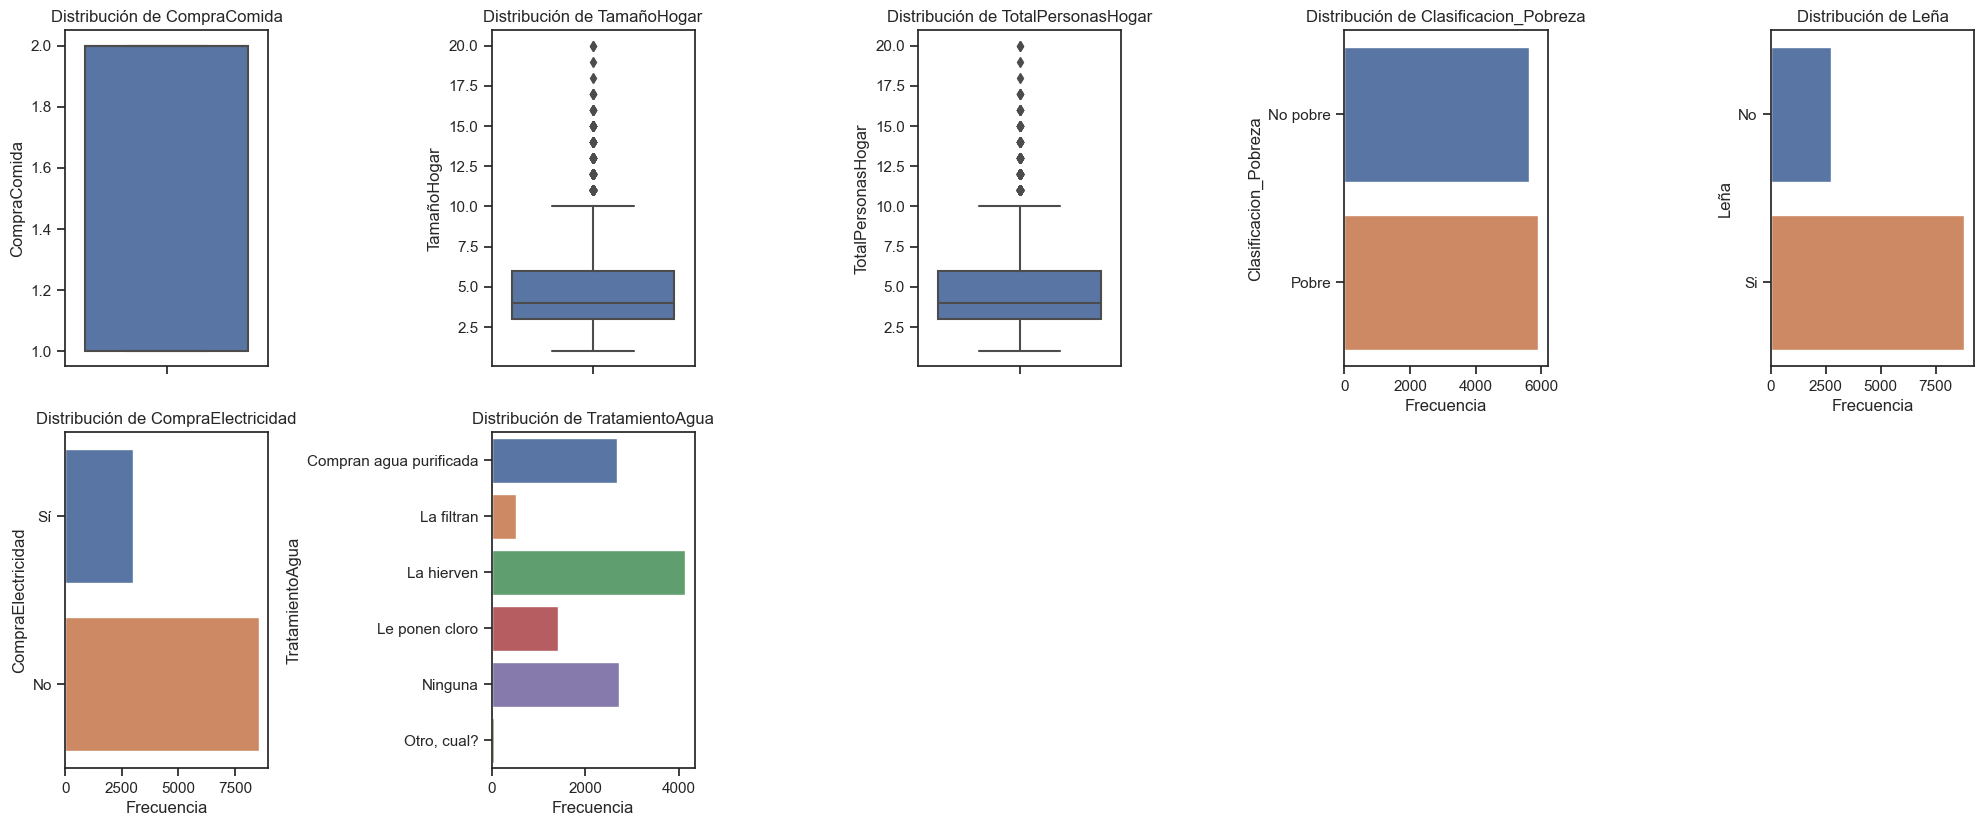

In [29]:
# DATASET HOGAR

columnas_categoricas = df_hogar.select_dtypes(include=['object', 'category']).columns

# Configuración para una cuadrícula de 5x5
num_filas = 5
num_columnas = 5
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según sea necesario

# Graficar las variables numéricas del dataset de hogar
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.boxplot(y=df_hogar[columna])
    plt.title(f'Distribución de {columna}')
    plt.ylabel(columna)

# Variables categóricas del dataset de hogar
for j, columna in enumerate(columnas_categoricas, i+1):
    plt.subplot(num_filas, num_columnas, j)
    sns.countplot(y=df_hogar[columna])
    plt.title(f'Distribución de {columna}')
    plt.xlabel('Frecuencia')
    plt.ylabel(columna)

plt.tight_layout()
plt.show()


##### *Análisis Bivariable (10 puntos)*

Como tercer paso, se realizó un análisis bivariable de las variables de interés. Para esto, se seguieron los siguientes pasos:

- Correlaciones entre variables.
- Scatter plots para relaciones entre pares de variables.

Antes de realizar este análisis, fue necesario realizar un proceso de encoding para poder convertir las variables categóricas en variables numéricas. Para esto, se utilizó la función `get_dummies` para realizar el encoding de las variables categóricas.

In [30]:
df_hogar[columnas_categoricas] = df_hogar[columnas_categoricas].astype(str)

# Creamos un LabelEncoder para cada columna categórica
label_encoders_hogar = {col: LabelEncoder() for col in columnas_categoricas}

# Recorremos las columnas categóricas y aplicamos la codificación en el DataFrame df_hogar
for col, encoder in label_encoders_hogar.items():
    df_hogar[col] = encoder.fit_transform(df_hogar[col].astype(str))

Como primer paso, se quiso analizar el <font color=orange>nivel de correlación entre las variables de interés</font>. Para esto, se utilizó la función `corr` para calcular la correlación entre las variables numéricas. Posteriormente, se graficó la matriz de correlación utilizando la función `heatmap` de la librería `seaborn`.



En el caso del dataset de **ENCOVI_Hogares**, se puede observar que:
- La utilización de leña y la compra de electricidad tienen una correlación de 0.92. Esto comprueba lo anteriormente mencionado, que las personas que compran electricidad no utilizan leña para cocinar.

- El tamaño del hogar y las personas en el hogar tienen una correlación de 0.99. Esto comprueba lo anteriormente mencionado, que el tamaño del hogar y las personas en el hogar son variables muy similares.

- La clasificación de pobreza y la compra de comida tienen una correlación de 0.50. Esto indica que la compra de comida puede ser un buen indicador de la clasificación de pobreza.

- El tratamiento de agua y la compra de comida tienen una correlación de 0.40. Ya que la compra de comida es un buen indicador de la clasificación de pobreza, se puede concluir que el tratamiento de agua también puede ser un buen indicador de la clasificación de pobreza.

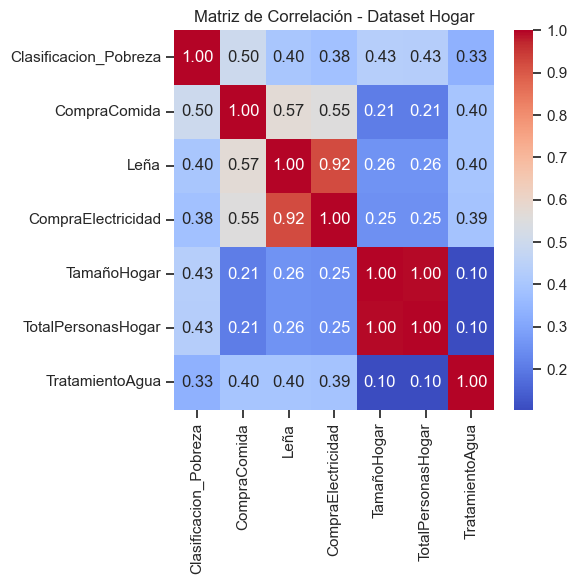

In [31]:
# Configuración de la figura para dos subplots
fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))

# Matriz de Correlación para el dataset de hogar
correlaciones_hogar = df_hogar.corr().abs()
sns.heatmap(correlaciones_hogar, annot=True, fmt=".2f", cmap="coolwarm", ax=ax1)
ax1.set_title('Matriz de Correlación - Dataset Hogar')

# Ajustar el layout para evitar la superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Como segundo paso del análisis bivariable, se procedió a <font color=orange>graficar las relaciones entre pares de variables</font>. Para esto, se utilizó la función `scatterplot` de la librería `seaborn` para graficar las relaciones entre pares de variables.

En el caso del dataset df_hogar, al realizar scatterplots de las variables, se puede observar que:

- Existe una clara relación lineal entre tamaño del hogar y personas en el hogar. Esto se debe a que son variables muy similares.

- No existe una relación visual entre las otras variables. Esto debido a que la mayoría de las variables son categóricas, por lo que no se puede graficar relaciones tan fácilmente.

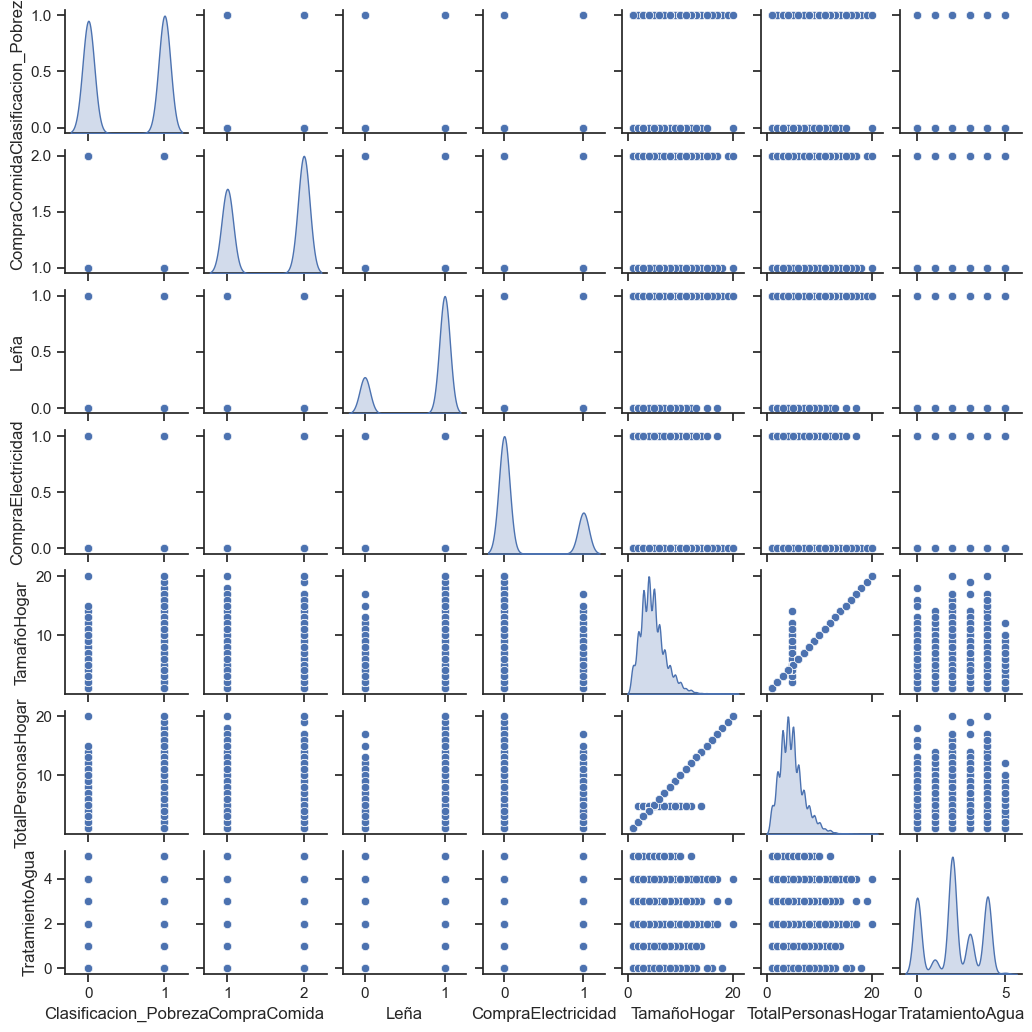

In [32]:
# SCATTERPLOT DF_HOGAR

sns.set(style="ticks")
sns.pairplot(df_hogar, diag_kind="kde", height=1.5)
plt.show()

##### *Visualización de Datos (10 puntos)*

Como cuarto y último paso del análisis exploratorio, se decidió <font color=orange>visualizar los datos utilizando diferentes tipos de gráficos</font>. 

Para esto, se utilizó **Pandas Profiling** para generar un reporte del dataset. 

<font color=red>

**PARA VER EL REPORTE, ABRIR EL JUPYTER NOTEBOOK (.IPYNB) DIRECTAMENTE O EL HTML GENERADO**

</font>

A continuación se presenta el reporte de Pandas Profiling para el dataset de hogares. En este caso, se puede observar que el reporte contiene información sobre las variables numéricas y categóricas. 

Algunos de los datos mostrados son:

Seguro, aquí tienes un resumen detallado de cada variable del conjunto de datos "Dataset Hogar", junto con conclusiones específicas para cada una:

1. **Clasificación_Pobreza**:
   - Tipo de Variable: Categórica
   - Rango de Valores: 1 a 3.
   - Distribución: 5,639 observaciones en la categoría "0", 5.897 en "1".
   - La categoría "1" es la más común, lo que podría indicar que la mayoría de los hogares en este conjunto de datos se clasifican como pobres. Los datos parecen estar mayormente balanceados.
2. **CompraComida**:
   - Tipo de Variable: Categórica
   - Rango de Valores: 1 a 2.
   - Distribución: 6,710 observaciones con "2.0", y 4,826 con "1.0".
   - La mayoría de los hogares compraron comida en los últimos 7 días, lo que sugiere un acceso relativamente bueno a los recursos alimenticios.
3. **Leña**:
   - Tipo de Variable: Categórica
   - Rango de Valores: 1 a 2.
   - Distribución: 8,811 observaciones con "1" y 2,725 con "0".
   - Un número significativo de hogares utiliza leña para cocinar, lo que podría indicar una dependencia de métodos tradicionales o la falta de acceso a alternativas modernas de cocción.
4. **CompraElectricidad**:
   - Tipo de Variable: Categórica
   - Rango de Valores: 1 a 2.
   - Distribución: 8,548 observaciones con "1" y 2,988 con "0".
   - La mayoría de los hogares no compraron electricidad en el último mes, lo que podría reflejar una amplia prevalencia de acceso regular y no medido a la electricidad o alternativas de energía.
5. **TamañoHogar**:
   - Tipo de Variable: Numérica
   - Rango de Valores: 1 a 20.
   - Valor Promedio: 4.752.
   - Los hogares tienden a tener un tamaño moderado, con un promedio de aproximadamente 5 miembros por hogar, indicando una estructura familiar típica.
6. **TotalPersonasHogar**:
   - Tipo de Variable: Numérica
   - Rango de Valores: 1 a 20.
   - Valor Promedio: 4.743.
   - Similar al tamaño del hogar, el número total de personas en el hogar también ronda los 5, reforzando la idea de hogares de tamaño medio.
7. **TratamientoAgua**:
   - Tipo de Variable: Categórica
   - Rango de Valores: 0 a 5.
   - Valor Promedio: 2.098.
   - El alto porcentaje de ceros sugiere que un número considerable de hogares no trata su agua, lo que podría ser un indicador de calidad del agua o de las prácticas de salud y seguridad en el hogar.


In [33]:
# Utilizar pandas profiling para generar reporte

# Generar reporte para el dataset de hogar
profile = ProfileReport(df_hogar, title='Pandas Profiling Report - Dataset Hogar')
profile.to_file(output_file="Pandas Profiling Report - Dataset Hogar.html")

# Mostar el reporte en el notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---------

#### **Parte 2: Modelado y Pruebas (45 Puntos)**

Para la segunda parte, se procedió a preparar los datos para el modelado. Asimismo, se procedió a dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. Finalmente, se desarolló los modelos de aprendizaje automático.

##### *Preparación de Datos (5 puntos)*

Para la preparación de los datos, se siguieron los siguientes pasos:
- Dividir el conjunto de datos en entrenamiento y prueba.
- Estandarización o normalización de variables si es necesario.


En este caso, se decidió <font color=orange>dividir los datos en un conjunto de entrenamiento y un conjunto de prueba</font>. Para esto, se utilizó la función `train_test_split` de la librería `sklearn`. 

A través de este procedimiento, se logró utilizar 80% de los datos para entrenamiento y 20% de los datos para prueba.

In [34]:
# Dividir datos en entrenamiento y validación

# Balancear las clases del dataset de hogar
sm = SMOTE(random_state=77)
X_hogar, y_hogar = sm.fit_resample(df_hogar.drop('Clasificacion_Pobreza', axis=1), df_hogar['Clasificacion_Pobreza'])

# Dividir el dataset de hogar en entrenamiento y validación
X_train_hogar, X_test_hogar, y_train_hogar, y_test_hogar = train_test_split(X_hogar, y_hogar, test_size=0.2, random_state=42)

En este caso, <font color=orange>no se decidió estandarizar o normalizar las variables debido a que se cree que no es necesario</font>. Esto considerando que la mayoría de variables son categóricas y fueron codificadas utilizando one-hot encoding. Por lo tanto, no se considera necesario estandarizar o normalizar las variables.

##### *Construcción del Modelo (20 puntos)*

Para la construcción del modelo, se siguieron los siguientes pasos:
- Elegir un modelo de aprendizaje automático adecuado para la tarea.
- Justificar la elección del modelo.
- Entrenar el modelo con el conjunto de datos.

*Selección de Modelos*
- En este caso, <font color=orange>se escogió utilizar una Feed Forward Neural Network (FFNN)</font>. Se escogió este tipo de red neuronal debido a su capacidad para identificar patrones complejos y realizar tareas de clasificación y predicción en datos.

*Justificación de la Elección del Modelos*
- Como se mencionó anteriormente, <font color=orange>las Feed Forward Neural Networks (FFNN) son capaces de captar y modelar correlaciones y patrones complejos en los datos</font>. Las FFNN, al estar compuestas de múltiples capas, tienen la capacidad de aprender representaciones no lineales, lo que es crucial cuando las relaciones entre las características no son lineales o son de alta dimensionalidad, como a menudo sucede en los datos socioeconómicos.
- Asimismo, cabe destacar que este modelo es relativamente fácil de entrenar y no requiere de mucho tiempo de entrenamiento. Esto especialmente considerando que los datasets  son muy grandes. Por lo tanto, se considera que este modelo es adecuado para el presente estudio.  
- Finalmente, debido a que no se está manejando series de tiempo, imágenes, o texto, se considera que FFNNs es el modelo de deep learning más adecuado para el presente estudio.


Al haber establecido el modelo a utilizar, se procedió programar el modelo. Para esto, se utilizó la librería `keras`.

Como se puede observar, se utilizó un modelo secuencial. Más específicamente, se utilizó un modelo secuencial con 2 capas ocultas. En este caso, se utilizó una función de activación `relu` para las capas ocultas y una función de activación `sigmoid` para la capa de salida. Asimismo, se utilizó una función de pérdida `binary_crossentropy` debido a que se trata de un problema de clasificación binaria. Finalmente, se utilizó un optimizador `adam` debido a que es un optimizador muy popular y eficiente.

A continuación se presenta el proceso de <font color=orange>entrenamiento del modelo para determinar si una persona es pobre o no</font>. Obviamente, el modelo utiliza información de las características de la vivienda para determinar esta clasificación.

In [35]:
# Crear el modelo de red neuronal para el dataset de hogar
modelo_hogar = Sequential()
modelo_hogar.add(Dense(128, input_dim=X_train_hogar.shape[1], activation='relu'))   # Capa de entrada con 128 neuronas
modelo_hogar.add(Dense(64, activation='relu'))                                      # Capa oculta con 64 neuronas
modelo_hogar.add(Dense(32, activation='relu'))                                      # Capa oculta con 32 neuronas
modelo_hogar.add(Dense(1, activation='sigmoid'))                                    # Capa de salida con 1 neurona

modelo_hogar.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Entrenar el modelo con Early stopping
modelo_hogar.fit(
    X_train_hogar, 
    y_train_hogar, 
    validation_data=(X_test_hogar, y_test_hogar), 
    epochs=20, 
    batch_size=64, 
    callbacks=[es]
)

Epoch 1/20
148/148 [==============================] - 2s 9ms/step - loss: 0.5552 - accuracy: 0.7140 - val_loss: 0.5140 - val_accuracy: 0.7541
Epoch 2/20
148/148 [==============================] - 1s 8ms/step - loss: 0.5030 - accuracy: 0.7634 - val_loss: 0.5164 - val_accuracy: 0.7558
Epoch 3/20
148/148 [==============================] - 1s 7ms/step - loss: 0.5014 - accuracy: 0.7642 - val_loss: 0.6355 - val_accuracy: 0.6316
Epoch 4/20
148/148 [==============================] - 1s 7ms/step - loss: 0.5447 - accuracy: 0.7345 - val_loss: 0.4984 - val_accuracy: 0.7541
Epoch 5/20
148/148 [==============================] - 1s 9ms/step - loss: 0.5660 - accuracy: 0.7304 - val_loss: 0.5007 - val_accuracy: 0.7537
Epoch 6/20
148/148 [==============================] - 1s 8ms/step - loss: 0.6052 - accuracy: 0.7151 - val_loss: 0.5771 - val_accuracy: 0.7249
Epoch 7/20
148/148 [==============================] - 1s 8ms/step - loss: 0.8146 - accuracy: 0.6952 - val_loss: 0.7523 - val_accuracy: 0.7041
Epoch 

##### *Evaluación del Modelo (10 puntos)*

Posterior de haber entrenado a ambos modelos, se optó por <font color=orange>evaluar el rendimiento de los mismos</font>. Para esto, se utilizó la función `classification_report` de la librería `sklearn` para evaluar el rendimiento de los modelos. Dicha función permite obtener la precisión, recall, y f1-score de los modelos.

En el caso de modelo que utiliza las características de la vivienda, se puede observar que:

- Para la clase 0 (no pobreza), la precisión es del 85%. Esto significa que de todas las predicciones realizadas por el modelo como no pobreza, el 85% eran correctas. Para la clase 1 (pobreza), la precisión es del 64%.

- Para la clase 0, el recall es del 50%. Esto indica que el modelo pudo identificar correctamente el 50% de los casos reales de no pobreza. Para la clase 1, el recall es del 91%. Esto significa que 91% de los casos reales de pobreza fueron correctamente identificados por el modelo.

- Para la clase 0, el F1-score es 0.63, que es una medida de la precisión y el recall. Para la clase 1, el F1-score es 0.75. Un F1 alto indica que tanto la precisión como el recall son altos.

La precisión general del modelo es del 70%. Esto significa que el 70% de todas las predicciones hechas por el modelo fueron correctas, lo que representa un rendimiento relativamente bueno.

In [36]:
# F1 Score, Precision y Recall para el conjunto de datos de hogar
y_pred_hogar = modelo_hogar.predict(X_test_hogar)           # Predecir etiquetas para el conjunto de prueba
y_pred_hogar = np.round(y_pred_hogar).astype(int)           # Redondear las predicciones
y_pred_hogar = y_pred_hogar.reshape(1, -1)[0]               # Aplanar el arreglo

# Mostrar métricas de desempeño
print(classification_report(y_test_hogar, y_pred_hogar))


# 0 es NO POBRE
# 1 es POBRE

74/74 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1192
           1       0.64      0.91      0.75      1167

    accuracy                           0.70      2359
   macro avg       0.74      0.70      0.69      2359
weighted avg       0.74      0.70      0.69      2359



##### *Optimización y Ajuste (10 puntos)*

Finalmente, se decidió intentar <font color=orange>ajustar ciertos hiperparámetros del modelo</font> para intentar mejorar el rendimiento del mismo. Para esto, se realizó una serie de experimentos para determinar cuáles hiperparámetros son los más adecuados para el modelo. Sin embargo, a continuación se presenta la estrucutra del modelo óptima que se encontró.

Como se puede observar a continuación, se realizaron los siguientes cambios:

- Se agregó una capa oculta adicional con 8 neuronas. 
- Se cambió las neuronas de las capas; de 128 se pasó a 64, de 64 se pasó a 32, y de 32 se pasó a 16. 
- Se aumentó el número de épocas y el número de batch size.
- Se cambió la función de pérdida de `binary_crossentropy` a `hinge`.
- Se disminuyó el learning rate de 0.001 a 0.0001.

A continuación se presenta el código del modelo óptimo encontrado.

In [37]:
# MODELO AJUSTADO CON LOS MEJORES HIPERPARÁMETROS
modelo2 = Sequential()
modelo2.add(Dense(64, input_dim=X_train_hogar.shape[1], activation='relu'))     # Se cambia el número de neuronas de la capa de entrada de 128 a 64
modelo2.add(Dense(32, activation='relu'))                                       # Se cambia el número de neuronas de la primera capa oculta de 64 a 32
modelo2.add(Dense(16, activation='relu'))                                       # Se cambia el número de neuronas de la segunda capa oculta de 32 a 16
modelo2.add(Dense(8, activation='relu'))                                        # Se agrega una capa oculta con 6 neuronas para mejorar el desempeño
modelo2.add(Dense(1, activation='sigmoid'))

modelo2.compile(loss='hinge', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])   # Se cambia la función de pérdida de 'binary_crossentropy' a 'hinge', se disminuye el learning rate de 0.001 a 0.0001

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Entrenar el modelo con Early stopping
modelo2.fit(
    X_train_hogar, 
    y_train_hogar, 
    validation_data=(X_test_hogar, y_test_hogar), 
    epochs=100,                                                         # Se aumenta el número de épocas de 20 a 100 para permitir que el modelo aprenda más
    batch_size=32,                                                      # Se redujo el tamaño del batch de 64 a 32 para mejorar el desempeño
    callbacks=[es]
)

NameError: name 'modelo2' is not defined

In [ ]:
# F1 Score, Precision y Recall para MODELO AJUSTADO CON LOS MEJORES HIPERPARÁMETROS
y_pred_hogar = modelo2.predict(X_test_hogar)           # Predecir etiquetas para el conjunto de prueba
y_pred_hogar = np.round(y_pred_hogar).astype(int)           # Redondear las predicciones
y_pred_hogar = y_pred_hogar.reshape(1, -1)[0]               # Aplanar el arreglo

# Mostrar métricas de desempeño
print(classification_report(y_test_hogar, y_pred_hogar))

# 0 es NO POBRE
# 1 es POBRE

74/74 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1192
           1       0.77      0.74      0.76      1167

    accuracy                           0.76      2359
   macro avg       0.76      0.76      0.76      2359
weighted avg       0.76      0.76      0.76      2359

